# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [68]:
#why u want to choose high accuracy score vs higher precision score. 
# given the model u have generated for use using differnet classifies such as random forest, logistics, wwhy did u choose the specific model to present to us
#  is it bcs of precision score,  accuracy score, T score, or F1 Score

In [69]:
import pandas as pd
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, roc_curve, auc


In [70]:
data = pd.read_csv('Dataset/data.csv')
data.isnull().sum()
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [71]:
from sklearn.model_selection import train_test_split

# x is dropping the Bankrupt? column
# y is the data which contain only Bankrupt? column
x = data.drop(columns= ['Bankrupt?']) 
y = data['Bankrupt?']
# train_test_split is used to split the data into training and testing data
# x_train is the input 
# y_train is the one that you want to predict
# x_test is testing the model using data that have been split before, so computer is not memorising the data
# x_test will predict the variable u want to predict, in this case is Bankruptcy
# y_test is the actual value of the predicted variable (Bankruptcy), so we can compare how the x_test(predicted) with y_test(actual value)
x_train, x_test, y_train, y_test = train_test_split(x, y)

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler() # to standardize the data with mean 0 and standard deviation 1

x_train_scaled = scaler.fit_transform(x_train) #fit_tranform, fit is to calculate the sd and mean of data. while transform is to calculate the z-scores using the mean and sd
x_test_scaled = scaler.transform(x_test) # as we alr have s and mean from train data, we just need to use the same sd and mean in our test data, to avoid bias

#we dont standardize the y value, bcs it's only one column, no bias
# then we want our training y value is the same as the real / actual value


In [79]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

model = LinearRegression() # use linear regression method

model.fit(x_train_scaled, y_train) # through linear regression, try to find the relationship between x (input data / categorical) and y (bankruptcy/ predicted)
#trying to find the best line,minimise error,and ask the model to find the pattern on how x and y is related 
y_pred = model.predict(x_test_scaled)
#after train the model to know the pattern of x and y, using the model to predict the test data\
# as we want to see how well the model predict compared to the actual value (y_test)


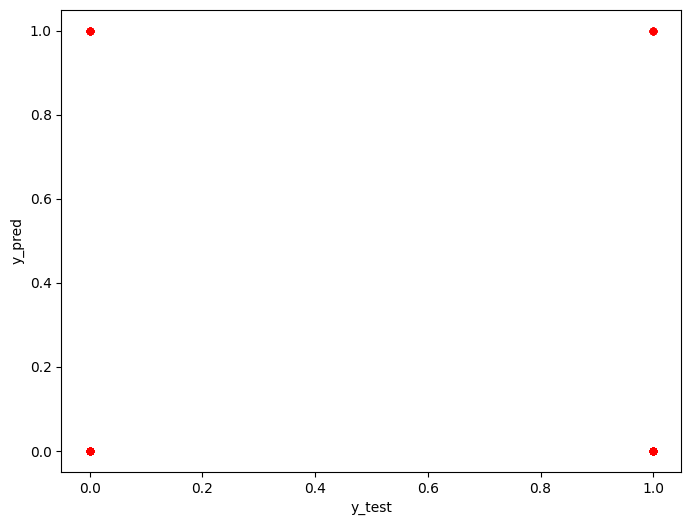

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, s=20, c='r') # plot scatter plot, to compare the predicted y using the model we have made before with the actual y value
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

#linear regression doesn't work bcs it is only work when doing continuous value
#here the value is discrete which is 1 or 0

In [80]:
from sklearn.model_selection import train_test_split

# x is dropping the Bankrupt? column
# y is the data which contain only Bankrupt? column
x = data.drop(columns= ['Bankrupt?']) 
y = data['Bankrupt?']
# train_test_split is used to split the data into training and testing data
# x_train is the input 
# y_train is the one that you want to predict
# x_test is testing the model using data that have been split before, so computer is not memorising the data
# x_test will predict the variable u want to predict, in this case is Bankruptcy
# y_test is the actual value of the predicted variable (Bankruptcy), so we can compare how the x_test(predicted) with y_test(actual value)
x_train, x_test, y_train, y_test = train_test_split(x, y)

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler() # to standardize the data with mean 0 and standard deviation 1

x_train_scaled = scaler.fit_transform(x_train) #fit_tranform, fit is to calculate the sd and mean of data. while transform is to calculate the z-scores using the mean and sd
x_test_scaled = scaler.transform(x_test) # as we alr have s and mean from train data, we just need to use the same sd and mean in our test data, to avoid bias

#we dont standardize the y value, bcs it's only one column, no bias
# then we want our training y value is the same as the real / actual value



In [ ]:
REG_CONST = 1 #regularization strength , choose 1 bcs it's in the middle value, it balanced , not too weak or strong
#high c mean regularization is weak
#Low REG_CONST → Large C → Weak regularization → Model tries to fit every detail, even if it's not useful. This may overfit and perform poorly on new data.
#High REG_CONST → Small C → Strong regularization → Model ignores some details to focus on simpler, general patterns, which helps it work better on new data.
# avoid overfitting


#logistic regression is used only for binary , where the result is either 1 or 0
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300) 
#i want to use class_weight={0: 1, 1: 30} but the f1 score more teribble
# class_weight because the data proportion is imbalance, like for 0, there is 6559 0 , and only 220 "1", so i want the model to focus more on minority, reduce error on the minority class
# 1 and 30 gained by using formula n1/n1+n2

#penalty l2, is prevent overfitting, L2 regularisation or called as Ridge regularization, using sum of squared method
#L2 is used here because to reduce the overfitting, where u don't want to eliminate the features here as all features seems important,
# C = is inverse of regularization strength
# A smaller REG_CONST (larger C) means weaker regularization (more flexibility for the model).
# A larger REG_CONST (smaller C) means stronger regularization (less flexibility).

#using L2, to make smooter line, ignoring
#L1 = Simplicity: The model becomes simpler by eliminating features.
#L1 regularization tends to ignore irrelevant or less important features by driving their coefficients exactly to zero.
#L1 = General pattern: L1 focuses on capturing the overall trend of the data by ignoring complex, irrelevant details.
#L2 = Less complex model: Reduces the impact of outliers and prevents the model from becoming too complex by keeping all features, but making them less important.
#L2 regularization tries to shrink the coefficients of all features, but does not set any of them to zero. It reduces the impact of features but still keeps them in the model.
#L2 = Avoiding overfitting: L2 doesn't completely discard any features but reduces their influence, which helps avoid overfitting by making the model more generalizable to new data.

model.fit(x_train_scaled, y_train) #ask the model to learn the pattern from training data, so that it can perform well on predicting the X_test_scaled to get something similar to Y_test(actual value)
# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled) # ask the model to predict x_test_scaled

acc = (y_pred == y_test).mean() #find the accuracy of model by comparing the prediction of model, and the actual value of y(y_test). as this is binary whether it is 0 or 1, we can using mean, sum all number and divide it with number of sample, to get the accuracy
print('\nAccuracy of test data = {:.3f}'.format(acc))



Accuracy of test data = 0.869


In [82]:
check = pd.DataFrame(y_pred)
check = check.rename(columns ={0:'1/0'})
check [check['1/0']==1]


,1/0
42,1
315,1
449,1
461,1
469,1
596,1
604,1
608,1
628,1
690,1


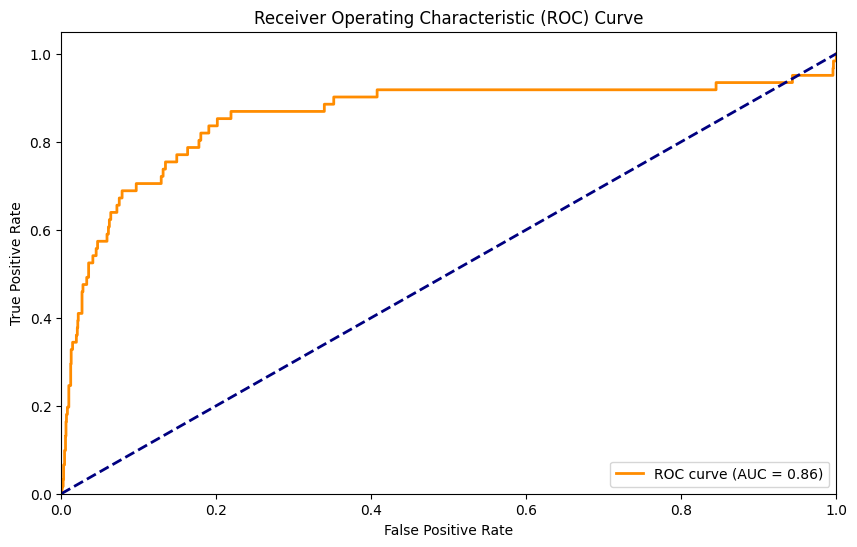

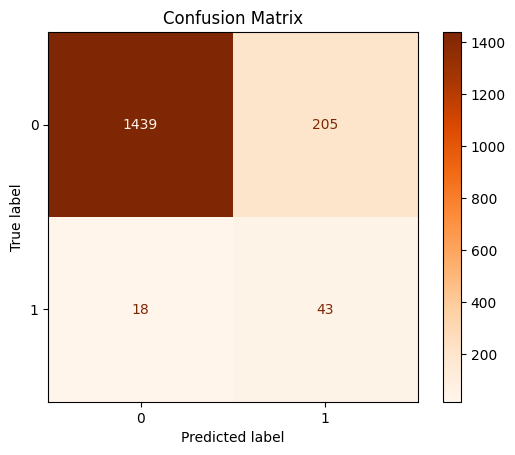

AUC Score: 0.857
F1 Score: 0.278

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1644
           1       0.17      0.70      0.28        61

    accuracy                           0.87      1705
   macro avg       0.58      0.79      0.60      1705
weighted avg       0.96      0.87      0.90      1705



In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report

# Get prediction probabilities
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1] 

#predict_proba is to predict the probability of each sample whether it is bankrupt or not
# e.g sample A can have 30 % not bankrupt, 70% bankrupt
# sample B can have 90% not bankrupt and 10 % bankrupt
# the ou put will be like [[0.3,0.7], [0.9,0.1], [0.2,0.8] ]
# the one we interested in is bankrupt which is on the second column = index 1 , as index in python started from 0
# [:,1] is selecting all rows, with column is index 1. index 1 column is the second column, which is the bankrupt proabbility that we interested

#The first column ([:, 0]): The probability that the company is not bankrupt (class 0).
#The second column ([:, 1]): The probability that the company is bankrupt (class 1)

#if we use predict instead of predict_proba, the model will round the value. so if it's 0.3 it will says no bankrupt and if it is 0.8 is bankrupt

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba) #actual vs predicted
roc_auc = auc(fpr, tpr) #area under curve, it's in this order (fpr,tpr) bcs fpr is on x axis and tpr is on y axis. it 's a standard order

#here we want to predict bankruptcy
#false positive rate, fpr, proportion of non bankrupt that is classified wrongly as bankrupt
# true positive rate, tpr, proportion of bankrupt that is classified truly as bankrupt
#positive here doesn't mean it is bad or good event, but positive refers to what we want to predict

#using ROC curve we want to see
#How often the model correctly identifies bankrupt companies (True Positives).
#How often the model incorrectly classifies non-bankrupt companies as bankrupt (False Positives).

#threshold => like set a standard rule for model. if the probability is more than something, it become considered as bankrupt
# if the predicted probability of bankruptcy is 70% (0.7), and you set the threshold at 50% (0.5), the model would say "bankrupt" because 0.7 is greater than 0.5.
# If the predicted probability is 30% (0.3), and the threshold is 0.5, the model would say "not bankrupt" because 0.3 is less than 0.5.
# _ is ignoring the threshold
#Ignoring the threshold means we evaluate the model’s performance across a range of thresholds (not just a fixed threshold like 0.5).

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # plot a line with x value from 0 to 1, and y value from 0 to 1 so we can see how well the model perform. as here only have two option whether bankrupt or not, then we have prpability 0.5 for each option. so we set is as default
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#we want see is the model perform well or not
# bcs if we not predict using model , basically we have proabability 0.5 for each option. we have 0.5 prob to guess wrong and 0.5 to guess right.
# good model must above this, it must better than guessing randomly
#AUC = 0.5: This is the baseline. The model is just guessing. It's no better than flipping a coin to determine whether a sample is bankrupt or not bankrupt.
#AUC > 0.5: The model is better than random guessing. The higher the AUC, the better the model is at distinguishing between the two classes (bankrupt vs. not bankrupt).
#AUC < 0.5: The model is performing worse than random guessing, meaning it's consistently predicting the wrong class.

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred) # create a matrix to count how many true positive, true negative, false postive, false negative 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # display the matrix, by using matrix value created before, and display it by looking the unique classes in the data after it being trained
disp.plot(cmap=plt.cm.Oranges) #colour map 
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
# why use y_pred?
# because in proba, don't have treshold, so basically the data become non-binary
# while the actual data , y_test is in binary
# so we must use y_pred rather than proba

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
This will lead to a bias, predicting the majority class more often, potentially ignoring the minority class. This can lead to high accuracy but poor performance on the minority class.